In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import os
import re
import seaborn as sns
import scipy.stats as ss
import random

In [53]:
pit_stops=pd.read_csv(r'./pit_stops.csv')
races=pd.read_csv(r'./races.csv')

In [54]:
pit_stops.drop(['time', 'duration'], axis=1, inplace=True)
#quitar hora de parada y tiempo en segundos

In [91]:
# cambiar tipo de campo milisegundpos a entero
pit_stops["milliseconds"].astype(int)

0       26898
1       25021
2       23426
3       23251
4       23842
        ...  
9891    22054
9892    22731
9893    21537
9894    22062
9895    22357
Name: milliseconds, Length: 9896, dtype: int32

In [95]:
print('Primera carrera registrada en csv pit_stops: {}'.format(pit_stops['raceId'].min()))
print('Última carrera registrada en csv pit_stops: {}'.format(pit_stops['raceId'].max()))

Primera carrera registrada en csv pit_stops: 841
Última carrera registrada en csv pit_stops: 1105


In [96]:
#index en races.csv de la primera carrera registrada en pit_stops  ==> 840
print(races[races.raceId==841].index)
print(races[races.raceId==1105].index)

Index([839], dtype='int64')
Index([1085], dtype='int64')


In [163]:
# rango de los indices de las carreras válidas  == 839 a 1085, para las carreras 841 a 1105

races[(races.raceId>=841) & (races.raceId<=1105)].index

Index([ 839,  840,  841,  842,  843,  844,  845,  846,  847,  848,
       ...
       1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085],
      dtype='int64', length=247)

In [161]:
# a partir del índice de races, creo un diccionario con raceId y nombre, para gráficos

dictraces={}
nombre_carreras=races[['raceId','name','year']]
for i in races[(races.raceId>=841) & (races.raceId<=1105)].index:
    dictraces[nombre_carreras.loc[i,'raceId']]={'año':nombre_carreras.loc[i, 'year'], 'nombre':nombre_carreras.loc[i, 'name'] }

dictraces

{841: {'año': 2011, 'nombre': 'Australian Grand Prix'},
 842: {'año': 2011, 'nombre': 'Malaysian Grand Prix'},
 843: {'año': 2011, 'nombre': 'Chinese Grand Prix'},
 844: {'año': 2011, 'nombre': 'Turkish Grand Prix'},
 845: {'año': 2011, 'nombre': 'Spanish Grand Prix'},
 846: {'año': 2011, 'nombre': 'Monaco Grand Prix'},
 847: {'año': 2011, 'nombre': 'Canadian Grand Prix'},
 848: {'año': 2011, 'nombre': 'European Grand Prix'},
 849: {'año': 2011, 'nombre': 'British Grand Prix'},
 850: {'año': 2011, 'nombre': 'German Grand Prix'},
 851: {'año': 2011, 'nombre': 'Hungarian Grand Prix'},
 852: {'año': 2011, 'nombre': 'Belgian Grand Prix'},
 853: {'año': 2011, 'nombre': 'Italian Grand Prix'},
 854: {'año': 2011, 'nombre': 'Singapore Grand Prix'},
 855: {'año': 2011, 'nombre': 'Japanese Grand Prix'},
 856: {'año': 2011, 'nombre': 'Korean Grand Prix'},
 857: {'año': 2011, 'nombre': 'Indian Grand Prix'},
 858: {'año': 2011, 'nombre': 'Abu Dhabi Grand Prix'},
 859: {'año': 2011, 'nombre': 'Brazi

In [102]:
pit_stops["milliseconds"][pit_stops.milliseconds<15000].describe()

count       56.000000
mean     14172.517857
std        584.055726
min      12897.000000
25%      13971.750000
50%      14136.000000
75%      14575.750000
max      14998.000000
Name: milliseconds, dtype: float64

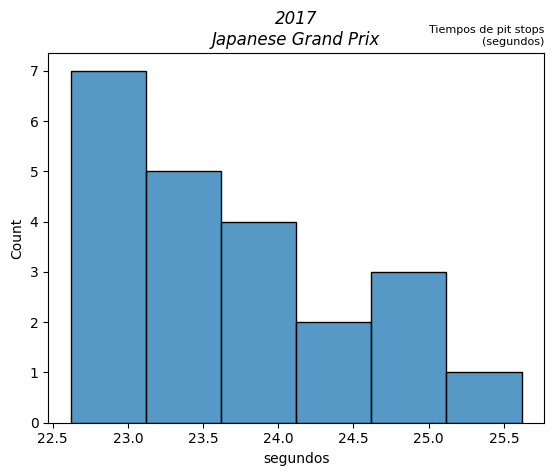

In [165]:
# ejemplos de distribución de los segundos de cada pit stop
carrera=random.randint(841,1105)

plt.xlabel('segundos')
plt.ylabel('cuenta')

plt.title(f"{dictraces[carrera]['año']}\n{dictraces[carrera]['nombre']}", loc='center', style='oblique', ha='center')
plt.title("Tiempos de pit stops\n(segundos)", fontsize=8, loc='right')

sns.histplot(pit_stops[pit_stops.raceId==carrera]["milliseconds"]/1000);

In [166]:
# diccionario con tiempos máximos y minimos de pit_stop por carrera
dict_max_min={}
for i in range(841,1006):
    dict_max_min[i]=(pit_stops[pit_stops.raceId==i]['milliseconds'].min(), pit_stops[pit_stops.raceId==i]['milliseconds'].max())

In [167]:
print(min(dict_max_min.values()))
print(max(dict_max_min.values()))

(12897, 43574)
(29736, 35112)


In [168]:
minimo=[]
maximo=[]
for j in dict_max_min.values():
    minimo.append(j[0])
    maximo.append(j[1])

In [169]:
print(f"Menor tiempo absoluto de pitstop: {min(minimo)}")
#print(f"Mayor tiempo menor de pitstop: {max(minimo)}")

#print(f"Menor tiempo mayor de pitstop: {min(maximo)}")
print(f"Mayor tiempo absoluto de pitstop: {max(maximo)}")

Menor tiempo absoluto de pitstop: 12897
Mayor tiempo absoluto de pitstop: 2011266


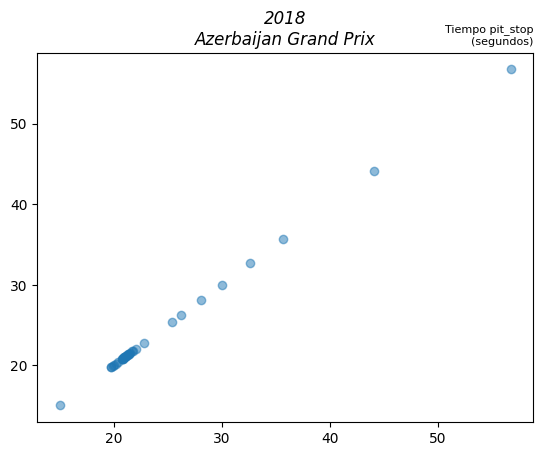

In [158]:
carrera=random.randint(841,1005)
#plt.title(f'Carrera Nº {carrera},\nTiempos de pit stops (en segundos)')
plt.title(f"{dictraces[carrera]['año']}\n{dictraces[carrera]['nombre']}", loc='center', style='oblique', ha='center')
plt.title(f'Tiempo pit_stop\n(segundos)', loc='right', fontsize=8)
plt.scatter(pit_stops[pit_stops.raceId==carrera]["milliseconds"]/1000, pit_stops[pit_stops.raceId==carrera]["milliseconds"]/1000, alpha=0.5)
